#Abstract
In this work the focus was on Discrete Fourier Transform calculation. A Gaussian function of time was given and the aim was to transfer it from the domain of time to the frequency domain.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

The Gaussian function of time:
$$g(t)=\exp[-(t-\tau)^2],$$

and its derivative

$$h(t)=g'(t) = - 2 (t-\tau) \exp [-(t-\tau)^2].$$

In [ ]:
"""
CONSTANTS
"""
tau = 3.0
a = 5.0
"""
FUNCTIONS
"""
def g(t):
  return np.exp(-np.power((t-tau), 2))
def h(t):
  return -2 * (t - tau) * g(t)

In [ ]:
def discrepancy(analytical, predicted):
  return np.abs(np.sqrt(np.mean(np.power(analytical - predicted, 2)))) # abs gets rid of imaginary part

#Introduction
The aim of this work was to make us familiar with the Discrete Fourier Transform.
First of all I manually computes the Discrete Fourier Transform of the given Gaussian function of time. Then I computed values of the Gaussian function of time and its derivative at different number of points: 2, 4, 8 etc. up to 64 (as stated in the task)

When the continious function of time was descretized, it was easy to try approximating it using numerical Discrete Fourier Transform. The obtained result was then compared to the true value of DFT (using RMSE). My hypothesis here was that the discrepancy will be the lower the more points I use.

The last step is to plot DFT and check a hypotesis given in the task. Which states that the DFT of a derivative of a function us DFT of the function, multiplied by $i\omega$

#Methodology
Discrete Fourier Transform can be viewed as transformation of a sequence of complex numbers (let it be called $X_n$) to another sequence of complex numbers ($X_k$). <br>
$$X_k = \Sigma X_n * (cos(\frac{k*n}{N}*2\pi) - i*sin(\frac{k*n}{N}*2\pi))$$
From the above it is seen that the Discrete Fourier Transform of a function can be calculated as an integral from -INF to INF of the given function multiplied by the exponent to the power of i $\sqrt{i} =-1$) and omega. <br>


## Analytical solution derivation
I will compute the integral on my own (I assume normalization around 1 and oscillation factor of -1)

$$G(\omega) = \int_{-\infty}^{\infty} e^{-(t - \tau)^2} * e ^{i * \omega * t}  dt = \sqrt{\pi}e^{\frac{-\omega^2}{4}-\tau i\omega}$$

$$H(\omega) = \int_{-\infty}^{\infty}(- 2 (t-\tau) \exp [-(t-\tau)^2]) * e ^{i * \omega * t} dt = i\omega\sqrt{\pi}e^{\frac{-\omega^2}{4}-\tau i\omega}$$


The hypothesis about DFT of a function and its derivative seems to be correct, since $$H(\omega) = \int_{-\infty}^{\infty}(- 2 (t-\tau) \exp [-(t-\tau)^2]) * e ^{i * \omega * t} dt = i\omega\sqrt{\pi}e^{\frac{-\omega^2}{4}-\tau i\omega} = G(\omega) * i\omega$$

In [ ]:
def true_dft_g(n):
  omega = np.linspace(-np.pi*n/(2*a),np.pi*n/(2*a), n)
  return np.sqrt(np.pi) * np.exp((-omega**2)/4 + 1j*tau*omega)

In [ ]:
def true_dft_h(n):
  omega = np.linspace(-np.pi*n/(2*a),np.pi*n/(2*a), n)
  return 1j*omega*np.sqrt(np.pi)*np.exp(- np.power(omega, 2)/4 - tau*1j*omega)

In [ ]:
points = []
n = 2
for i in range(6):
  points.append(n)
  n *= 2
points = np.array(points)

In [ ]:
def plot_function(points, func1):
  fig, ax = plt.subplots(figsize=(15,10))
  for i in range(len(points)):
    interval = np.linspace(-a + tau, a + tau, points[i])
    plt.plot(interval, func1(interval),  label=str(points[i])+" points")
  plt.ylabel('Function of t')
  plt.xlabel('t')
  plt.legend()
  plt.grid()
  plt.show()

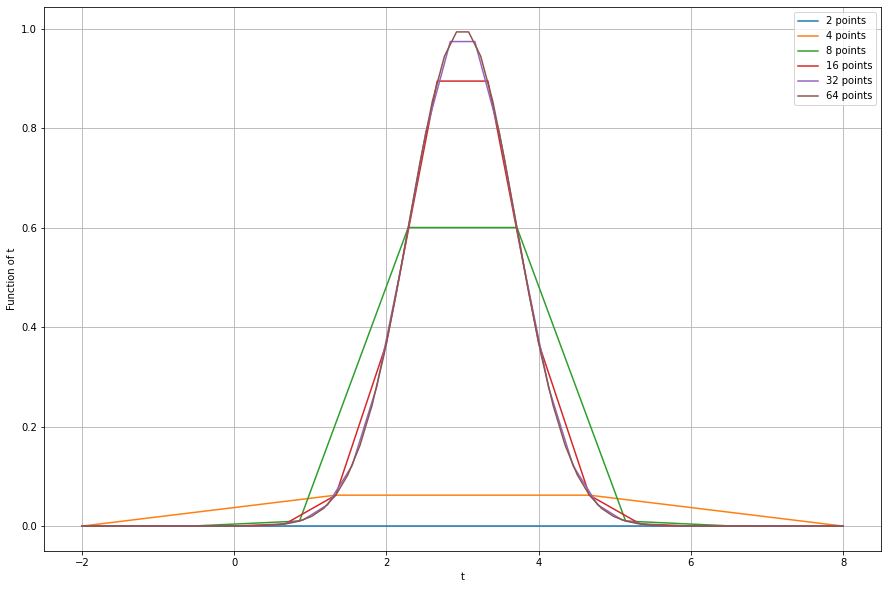

In [ ]:
plot_function(points, g)

It is clear that in both cases the more points we use -> the better is approximation. It means that for the next step only 64 points can be used

In [ ]:
from scipy.fft import fft, fftshift
total_discrepancy = []
for i in range(len(points)):
  interval = np.linspace(-a + tau, a + tau, points[i])
  total_discrepancy.append(discrepancy(true_dft_g(points[i]), fftshift(fft(g(interval),  norm='ortho'))) +discrepancy(true_dft_h(points[i]), fftshift(fft(h(interval),  norm='ortho'))) )



In [ ]:
def plot_discrepancy(discrepancy_results, points):
  plt.plot(points, discrepancy_results)

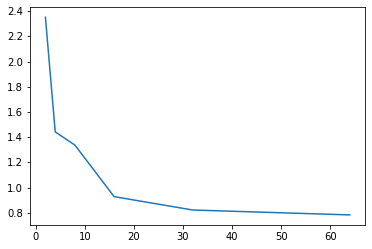

In [ ]:
plot_discrepancy(total_discrepancy, points)

It is clear that the discrepancy decreases with increase in N

In [ ]:
def plot_number(func):
  n = 64
  omega = np.linspace(-np.pi*n/(2*a), np.pi*n/(2*a), n)
  fig, ax = plt.subplots(figsize=(15,16))
  plt.plot(omega, func(64).real, label="real value")
  plt.plot(omega, func(64).imag, label="imaginary value")
  plt.legend()
  plt.show()

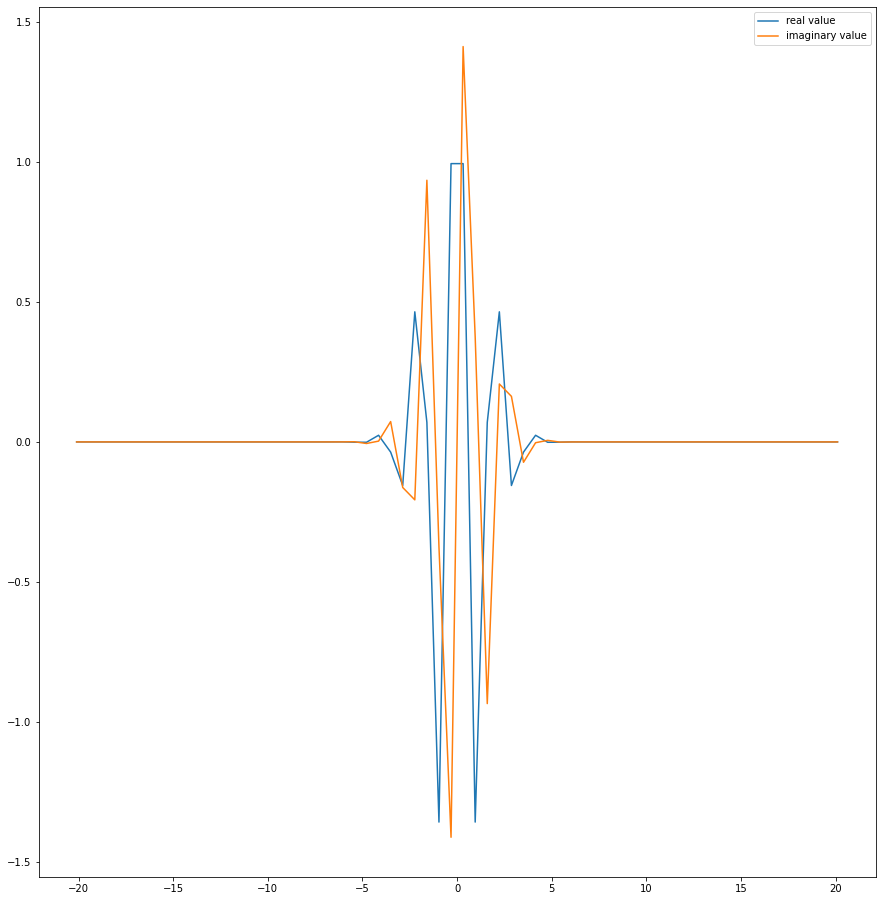

In [ ]:
plot_number(true_dft_g)

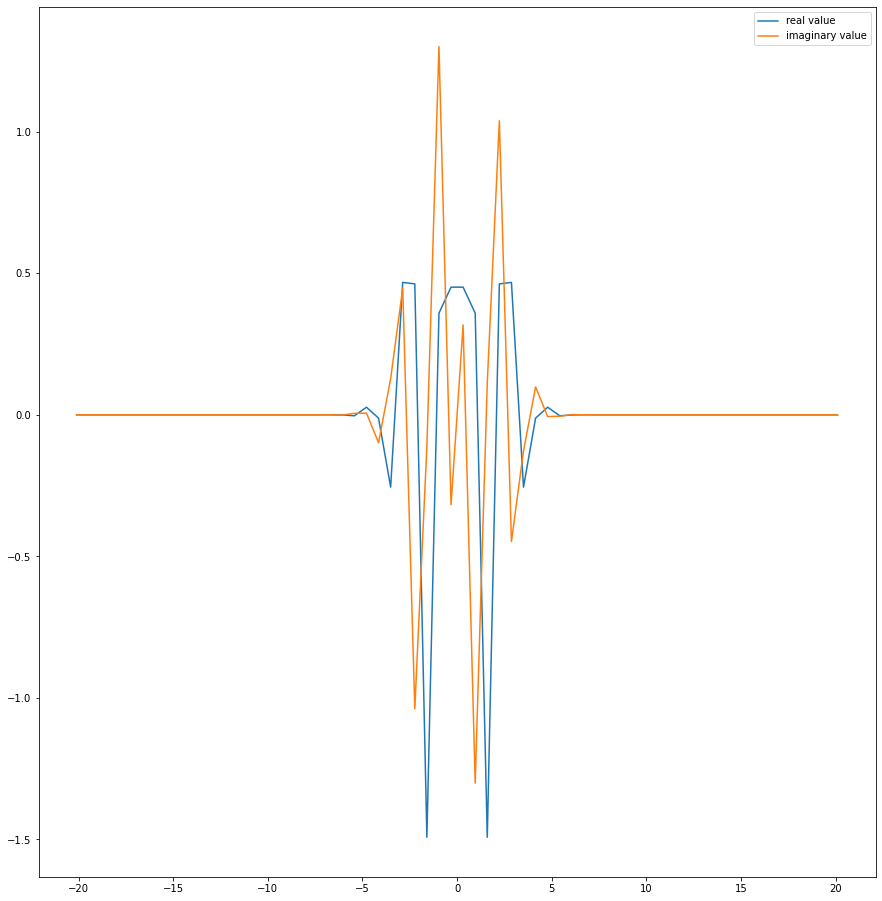

In [ ]:
plot_number(true_dft_h)

Analytical solution: hypothesis check<br>
It was assumed that H($\omega$) can be obtained if we multiply G($\omega$) by $i * \omega$. From the theoretical solution it is clear that this assmption was correct. Now we can simply check it computing discrepancy

In [ ]:
omega = np.linspace(-np.pi*n/(2*a), np.pi*n/(2*a), n)
predicted = fft(1j*omega * true_dft_g(64), norm="ortho")
discrepancy(true_dft_h(64), predicted)

0.3985272870582936

The small discrepancy obtained in the previous step allows to conclude that the assumption was correct

#Conclusion
In this work we have been working with Discrete Fourier Transform. Now we can apply it for laboratory works and other experiments. For example, we can use it to get rid of noizes on audio tapes. Additionaly, we can implement jpeg encoding using Discrete Fourier Transform. <br>
From the theoretical point of view, this work allows to state that the Fourier transform of the derivative $f'(t)$ is equal to $i \omega F(\omega)$, where $F(\omega)$ is the Fourier transform of $f(t)$. Which means that we do not need to look for the analytical solution of DFT of the derivative in further works. 